## **Libraries**

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
from scipy import stats
from sklearn.model_selection import (KFold, GridSearchCV, train_test_split, 
                                     StratifiedKFold, cross_val_predict, 
                                     cross_val_score, learning_curve)
from sklearn.metrics import (mean_squared_error, r2_score, f1_score, 
                             precision_score, accuracy_score, recall_score, 
                             roc_curve, auc, confusion_matrix)
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, 
                                  HuberRegressor, LogisticRegression)
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import category_encoders as ce

warnings.filterwarnings('ignore')  # Ignore warnings due to version problems
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.stats as stats


In [112]:
# Install necessary packages (comment out if not needed in the running environment)
# !pip install category_encoders
# !pip install mlxtend
# !pip install xgboost
# !pip install --upgrade jinja2

## **Data connection**

In [113]:
# for jupyter notebook
expired_2019 = pd.read_csv('expired_2019.csv')

#forgot to remove on prior step :)
expired_2019 = expired_2019.drop(columns=['earliest_cr_line'])

Making sure we didnt left any NANs behind

In [114]:
num_nans_removed = expired_2019.isnull().sum().sum()
expired_2019.dropna(inplace=True)
print(f"Number of NaNs removed: {num_nans_removed}")


Number of NaNs removed: 1


This version of our data does not contain the updated expected_return without the outliers

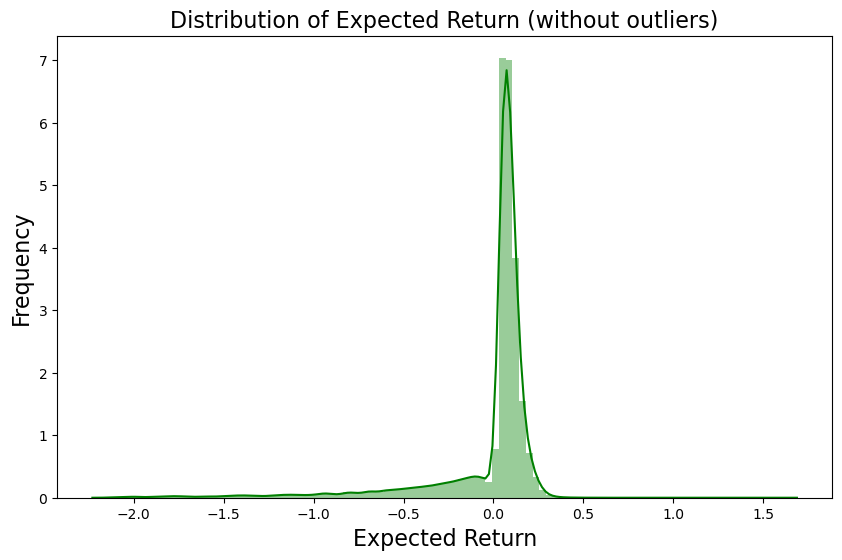

Number of outliers removed: 5101


In [115]:
#removing from the expected return outliers that are  3*std from the mean and then print the new distribution and the count of outliers removed

# Calculate the mean and standard deviation of the expected return
mean = expired_2019['expected_return'].mean()
std = expired_2019['expected_return'].std()

# Identify outliers that are more than 3 standard deviations from the mean
outliers = expired_2019[
    (expired_2019['expected_return'] > mean + 3 * std) |
    (expired_2019['expected_return'] < mean - 3 * std)
]

# Remove outliers from the DataFrame
expired_2019 = expired_2019.drop(outliers.index)

# Print the new distribution of the expected return
plt.figure(figsize=(10, 6))
sns.distplot(expired_2019['expected_return'], color='g', bins=100)
plt.title('Distribution of Expected Return (without outliers)', fontsize=16)
plt.xlabel('Expected Return', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

# Print the count of outliers removed
print(f'Number of outliers removed: {len(outliers)}')


## Dataset Features & Shape

In [116]:
for index, column_name in enumerate(expired_2019.columns, start=1):
    print(f"{index}. {column_name}")

1. loan_amnt
2. term
3. int_rate
4. grade
5. sub_grade_encoded
6. emp_length
7. emp_status
8. annual_inc
9. loan_status
10. dti
11. delinq_2yrs
12. fico_range_low
13. open_acc
14. pub_rec
15. revol_bal
16. revol_util
17. total_acc
18. open_act_il
19. il_util
20. max_bal_bc
21. all_util
22. total_rev_hi_lim
23. total_cu_tl
24. acc_open_past_24mths
25. avg_cur_bal
26. bc_open_to_buy
27. bc_util
28. mo_sin_old_rev_tl_op
29. mo_sin_rcnt_rev_tl_op
30. mo_sin_rcnt_tl
31. mort_acc
32. num_accts_ever_120_pd
33. num_actv_bc_tl
34. num_actv_rev_tl
35. num_bc_sats
36. num_bc_tl
37. num_il_tl
38. num_op_rev_tl
39. num_rev_accts
40. num_tl_op_past_12m
41. pct_tl_nvr_dlq
42. pub_rec_bankruptcies
43. tot_hi_cred_lim
44. total_bc_limit
45. expected_return
46. yield_is_above_2
47. quarter_1
48. quarter_2
49. quarter_3
50. quarter_4
51. earliest_cr_line_months
52. home_ownership_MORTGAGE
53. home_ownership_OWN
54. home_ownership_RENT
55. purpose_Other
56. purpose_credit_card
57. purpose_debt_consolidati

In [117]:
print(expired_2019.shape)


(318627, 61)


In [118]:
expired_2019.head()

,loan_amnt,term,int_rate,grade,sub_grade_encoded,emp_length,emp_status,annual_inc,loan_status,dti,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_Other,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_other,initial_list_status_f,initial_list_status_w
0,9000,36,2.791778,3,0.282591,9,1,10.859018,0,18.86,...,False,False,True,False,False,True,False,False,False,True
1,8000,36,2.463853,2,0.166972,5,1,11.198228,0,10.85,...,False,False,True,False,False,True,False,False,False,True
2,12800,36,2.564180,3,0.209263,6,1,10.878066,0,20.99,...,True,False,False,False,True,False,False,False,False,True
3,5000,36,2.850128,4,0.308932,10,1,11.561725,1,9.07,...,True,False,False,False,False,True,False,False,False,True
4,24000,36,2.374906,2,0.140606,5,1,10.819798,1,24.46,...,True,False,False,False,False,True,False,False,False,True


## Classification



Loading + prep for the data for the classification models

In [119]:
c_data=expired_2019.copy()

**Lets look again at the above 2% distribution** :

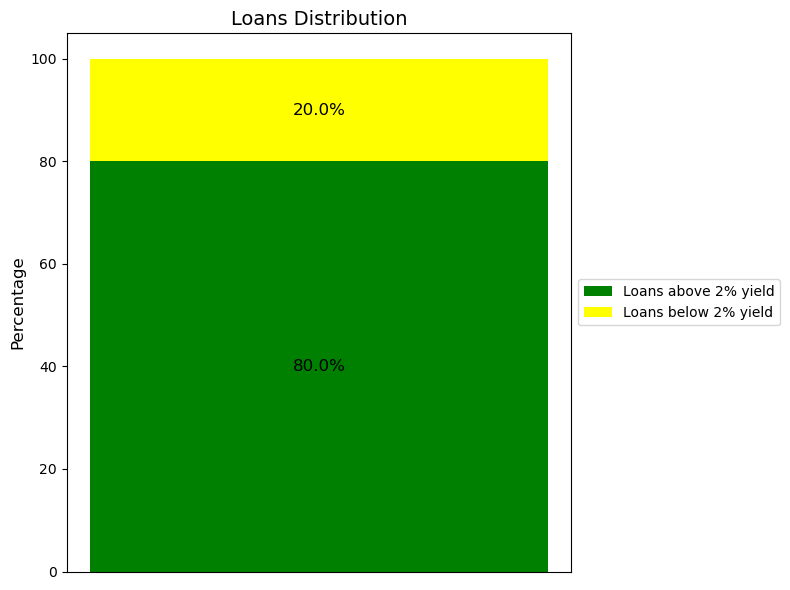

We have 254905 loans above 2% yield (80.0%)
We have 63722 loans below 2% yield (20.0%)


In [120]:

# Calculate the counts and percentages
counts = c_data['yield_is_above_2'].value_counts()
above_per = counts[0] / c_data.shape[0] * 100
below_per = counts[1] / c_data.shape[0] * 100

# Colors and labels for the bars
colors = ['green', 'yellow']
labels = ['Loans above 2% yield', 'Loans below 2% yield']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(0, above_per, width=0.8, color=colors[0], label=labels[0])
ax.bar(0, below_per, bottom=above_per, width=0.8, color=colors[1], label=labels[1])

# Set title and labels
ax.set_title("Loans Distribution", fontsize=14)
ax.set_ylabel("Percentage", fontsize=12)

ax.set_xticks([])
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

# Add labels to the percentages
ax.text(0, above_per/2, f'{above_per:.1f}%', ha='center', va='center', color='black', fontsize=12)
ax.text(0, above_per + below_per/2, f'{below_per:.1f}%', ha='center', va='center', color='black', fontsize=12)

# Adjust layout to fit everything
plt.tight_layout()

plt.show()

print(f"We have {counts[0]} loans above 2% yield ({above_per:.1f}%)")
print(f"We have {counts[1]} loans below 2% yield ({below_per:.1f}%)")


We can see the is a great inbalance in our target variable that we'll need to address

## Details regarding the best models extracted from the last step

**Logistic Regression Results:**

- Average F1 score: 0.7034582892798422
- Average Precision: 0.7351413594789831
- Average Accuracy: 0.682922924457022
- Average Recall: 0.682922924457022

**Confusion Matrix:**

 [[62772 22001]
 
 [11666  9741]]

Best hyperparameters: {'C': 0.013257113655901081}

Selected features:[1, 12, 19, 20, 23, 29, 38, 40, 41, 44, 48, 53, 54, 58, 60]

 
**XGBoost Results:**

- Average F1 score: 0.6321853489736368
- Average Precision: 0.765521249502637
- Average Accuracy: 0.5922070430384675
- Average Recall: 0.5922070430384675

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3}

Selected features: [0, 1, 3, 5, 7, 8, 9, 21, 28, 40, 42, 43, 45, 49, 57]

**Confusion Matrix:**

 [[47643 37130]
 
 [ 6169 15238]]

## Our Best models from the previews step 

Logistic Regression Results:
Average F1 score: 0.6939402672129585
Average Precision: 0.7595586491602211
Average Accuracy: 0.6634183849606127
Average Recall: 0.6634183849606127
Best hyperparameters: {'C': 1.7575106248547894}
Confusion Matrix:
 [[34738 16261]
 [ 5188  7539]]

XGBoost Results:
Average F1 score: 0.7034755364338819
Average Precision: 0.7598267661428789
Average Accuracy: 0.6755327495841572
Average Recall: 0.6755327495841572
Best hyperparameters: {'learning_rate': 0.3, 'max_depth': 9}
Confusion Matrix:
 [[35728 15271]
 [ 5406  7321]]


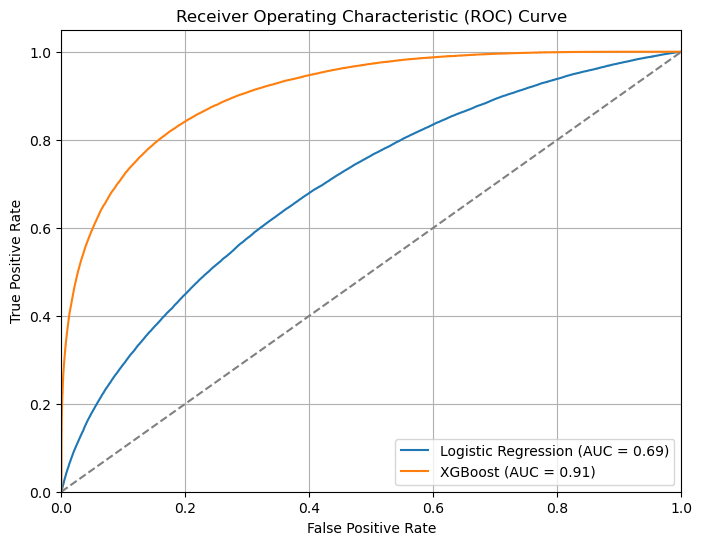

In [121]:
lgc_data = expired_2019.copy()
lgc_data.drop(['expected_return', 'loan_status', 'sub_grade_encoded'], axis=1, inplace=True)
X = lgc_data.drop(columns=['yield_is_above_2']).values
y = lgc_data['yield_is_above_2'].values

# Predefined selected features for each classifier
selected_features_lg = [0, 1, 3, 5, 7, 8, 9, 21, 28, 40, 42, 43, 45, 49, 54]
selected_features_xgb = [0, 1, 3, 5, 7, 8, 9, 21, 28, 40, 42, 43, 45, 49, 54]

def classifier_with_selected_features(X, y, selected_features, classifier, param_grid):
    """
    Performs classification with predefined selected features using train-test split.

    Returns:
        tuple: A tuple containing the F1 score, precision, accuracy, recall, best hyperparameters, and confusion matrix.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Hyperparameter tuning
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='f1_weighted')
    grid_search.fit(X_train_selected, y_train)
    best_params = grid_search.best_params_

    best_model = grid_search.best_estimator_

    if isinstance(classifier, LogisticRegression):
        # No need to handle class imbalance for logistic regression
        best_model.fit(X_train_selected, y_train)
    else:
        # Adjusting sample weights for class imbalance
        class_weights = {0: 1.0, 1: 1.0}  # Initialize sample weights
        class_weights[0] *= len(y_train) / (2 * np.sum(y_train == 0))  # Adjust weights for class 0
        class_weights[1] *= len(y_train) / (2 * np.sum(y_train == 1))  # Adjust weights for class 1
        
        best_model.fit(X_train_selected, y_train, sample_weight=[class_weights[i] for i in y_train])

    y_pred = best_model.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')

    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    return f1, precision, accuracy, recall, best_params, confusion_matrix_result


# Hyperparameter grids
param_grid_logistic = {'C': np.logspace(-4, 4, 50)}
param_grid_xgboost = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 6, 9]}

# Logistic Regression
avg_f1_score_lg, avg_precision_lg, avg_accuracy_lg, avg_recall_lg, best_params_lg, conf_matrix_lg = classifier_with_selected_features(
    X, y, selected_features_lg, LogisticRegression(solver='liblinear', penalty="l2", class_weight='balanced'), param_grid_logistic)
print("Logistic Regression Results:")
print("Average F1 score:", avg_f1_score_lg)
print("Average Precision:", avg_precision_lg)
print("Average Accuracy:", avg_accuracy_lg)
print("Average Recall:", avg_recall_lg)
print("Best hyperparameters:", best_params_lg)
print("Confusion Matrix:\n", conf_matrix_lg)

# XGBoost Classifier
avg_f1_score_xgb, avg_precision_xgb, avg_accuracy_xgb, avg_recall_xgb, best_params_xgb, conf_matrix_xgb = classifier_with_selected_features(
    X, y, selected_features_xgb, XGBClassifier(n_estimators=100, random_state=42), param_grid_xgboost)
print("\nXGBoost Results:")
print("Average F1 score:", avg_f1_score_xgb)
print("Average Precision:", avg_precision_xgb)
print("Average Accuracy:", avg_accuracy_xgb)
print("Average Recall:", avg_recall_xgb)
print("Best hyperparameters:", best_params_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

# ROC Curve
def plot_roc_curve(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=label + ' (AUC = %0.2f)' % roc_auc)

y_score_lg = LogisticRegression(solver='liblinear', penalty="l2", class_weight='balanced', **best_params_lg).fit(X[:, selected_features_lg], y).decision_function(X[:, selected_features_lg])
y_score_xgb = XGBClassifier(n_estimators=250, random_state=42, **best_params_xgb).fit(X[:, selected_features_xgb], y).predict_proba(X[:, selected_features_xgb])[:, 1]

plt.figure(figsize=(8, 6))
plot_roc_curve(y, y_score_lg, 'Logistic Regression')
plot_roc_curve(y, y_score_xgb, 'XGBoost')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Implementation of cascading 


**We'll use as base line of this step the classification of our intances based on majority representation in Grade (under 2%)**

In [122]:

# Calculate the percentage of loans under 2% yield by grade
yield_under_2_percent = c_data[c_data['yield_is_above_2'] == 1].groupby('grade').size()
total_loans_by_grade = c_data.groupby('grade').size()
yield_under_2_percent = (yield_under_2_percent / total_loans_by_grade) * 100

# Create a new DataFrame with the desired columns
table_c_data = pd.DataFrame({
    'grade': yield_under_2_percent.index,
    'percentage of loans under 2% yield': yield_under_2_percent.values
})

# Sort grades and create a mapping from numerical grades to alphabetical grades
sorted_grades = sorted(table_c_data['grade'])
grade_mapping = {grade: chr(65 + i) for i, grade in enumerate(sorted_grades)}

# Apply the mapping to the grade column
table_c_data['grade'] = table_c_data['grade'].map(grade_mapping)

# Add the majority_grade_pred column
table_c_data['majority_grade_pred'] = table_c_data['percentage of loans under 2% yield'].apply(
    lambda x: 'over' if x <= 50 else 'under'
)

# Define a function to highlight the majority_grade_pred column
def highlight_majority(s):
    if s == 'over':
        return 'background-color: green'
    elif s == 'under':
        return 'background-color: red'
    return ''

# Apply the styling to the DataFrame
styled_table = table_c_data.style.applymap(highlight_majority, subset=['majority_grade_pred'])

# Display the styled table
styled_table


,grade,percentage of loans under 2% yield,majority_grade_pred
0,A,6.461198,over
1,B,14.291467,over
2,C,22.989644,over
3,D,31.469618,over
4,E,39.195043,over
5,F,48.162041,over
6,G,50.926446,under


In [123]:
lgc_data = expired_2019.copy()
lgc_data.drop(['expected_return', 'loan_status', 'sub_grade_encoded'], axis=1, inplace=True)
X = lgc_data.drop(columns=['yield_is_above_2']).values
y = lgc_data['yield_is_above_2'].values

# Predefined selected features for each classifier (extracted with FFS from last step)
selected_features = [0, 1, 3, 5, 7, 8, 9, 21, 28, 40, 42, 43, 45, 49, 54]

# Function to classify with selected features
def classifier_with_selected_features(X, y, selected_features, classifier, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='f1_weighted')
    grid_search.fit(X_train_selected, y_train)
    best_model = grid_search.best_estimator_
    if not isinstance(classifier, LogisticRegression):
        class_weights = {0: len(y_train) / (2 * np.sum(y_train == 0)), 
                         1: len(y_train) / (2 * np.sum(y_train == 1))}
        best_model.fit(X_train_selected, y_train, sample_weight=[class_weights[i] for i in y_train])
    else:
        best_model.fit(X_train_selected, y_train)
    y_pred = best_model.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    return f1, precision, accuracy, recall, grid_search.best_params_, confusion_matrix_result, best_model

# Hyperparameter grids
param_grid_logistic = {'C': np.logspace(-4, 4, 50)}
param_grid_xgboost = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 6, 9]}

# Logistic Regression
_, _, _, _, best_params_lg, _, best_model_lg = classifier_with_selected_features(
    X, y, selected_features, LogisticRegression(solver='liblinear', penalty="l2", class_weight='balanced'), param_grid_logistic)

# XGBoost Classifier
_, _, _, _, best_params_xgb, _, best_model_xgb = classifier_with_selected_features(
    X, y, selected_features, XGBClassifier(n_estimators=100, random_state=42), param_grid_xgboost)

# Function to adjust threshold and compute new metrics
def adjust_threshold_and_get_predictions(model, X, selected_features, threshold):
    y_pred_proba = model.predict_proba(X[:, selected_features])[:, 1]
    y_pred_adjusted = (y_pred_proba > threshold).astype(int)
    return y_pred_adjusted



## Picking the best treshold

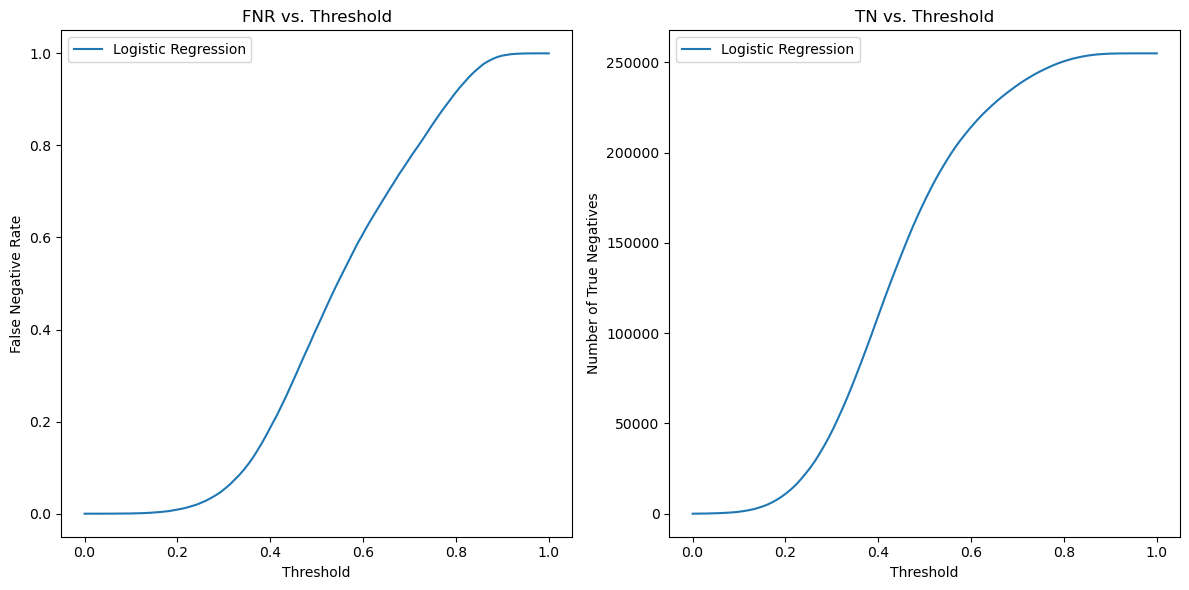

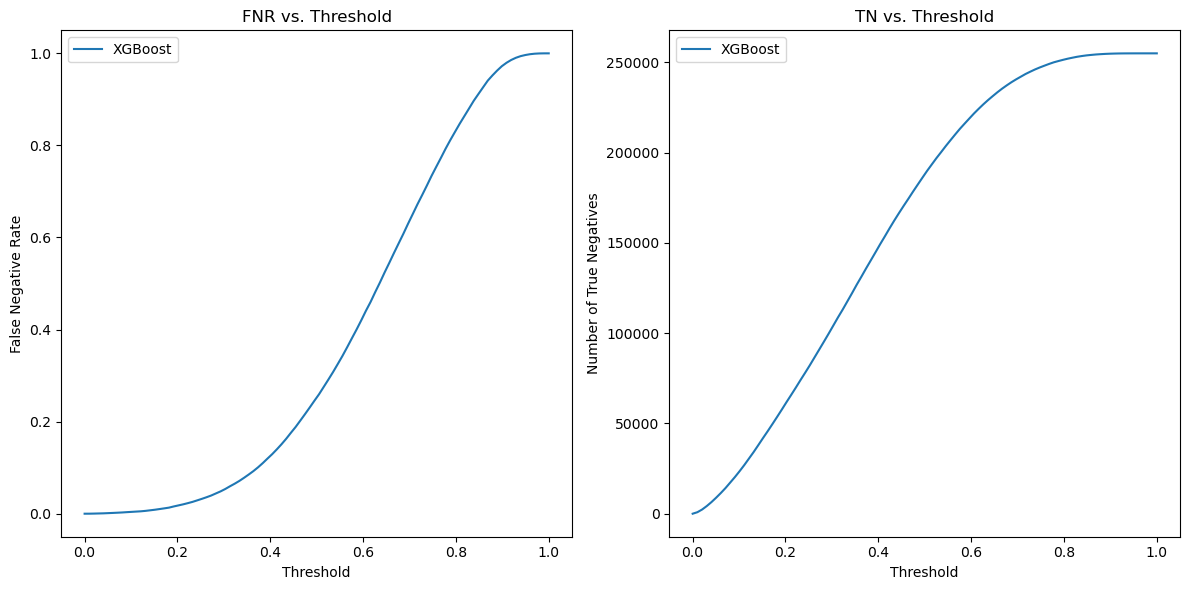

In [124]:
# Function to calculate FNR and number of TN for a given threshold
def evaluate_thresholds(model, X, selected_features, y, thresholds):
    fnr_list = []
    tn_list = []
    for threshold in thresholds:
        y_pred_adjusted = adjust_threshold_and_get_predictions(model, X, selected_features, threshold)
        tn, fp, fn, tp = confusion_matrix(y, y_pred_adjusted).ravel()
        fnr = fn / (fn + tp)  # False Negative Rate
        fnr_list.append(fnr)
        tn_list.append(tn)
    return fnr_list, tn_list

# Define the range of thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Evaluate thresholds for Logistic Regression
fnr_list_lg, tn_list_lg = evaluate_thresholds(best_model_lg, X, selected_features, y, thresholds)

# Plot FNR vs. Threshold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(thresholds, fnr_list_lg, label='Logistic Regression')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate')
plt.title('FNR vs. Threshold')
plt.legend()

# Plot TN vs. Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds, tn_list_lg, label='Logistic Regression')
plt.xlabel('Threshold')
plt.ylabel('Number of True Negatives')
plt.title('TN vs. Threshold')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate thresholds for XGBoost
fnr_list_xg, tn_list_xg = evaluate_thresholds(best_model_xgb, X, selected_features, y, thresholds)

# Plot FNR vs. Threshold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(thresholds, fnr_list_xg, label='XGBoost')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate')
plt.title('FNR vs. Threshold')
plt.legend()

# Plot TN vs. Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds, tn_list_xg, label='XGBoost')
plt.xlabel('Threshold')
plt.ylabel('Number of True Negatives')
plt.title('TN vs. Threshold')
plt.legend()

plt.tight_layout()
plt.show()

**Printing values between 0.2-0.4 treshold**

In [125]:

# Function to calculate FNR and number of TN for a given threshold
def evaluate_thresholds(model, X, selected_features, y, thresholds):
    results = []
    for threshold in thresholds:
        y_pred_adjusted = adjust_threshold_and_get_predictions(model, X, selected_features, threshold)
        tn, fp, fn, tp = confusion_matrix(y, y_pred_adjusted).ravel()
        fnr = fn / (fn + tp)  # False Negative Rate
        results.append((threshold, fnr, tn))
    return results

# Define the range of thresholds to evaluate (0.20 to 0.40 in increments of 0.01)
thresholds = np.arange(0.15, 0.35, 0.01)

# Evaluate thresholds for Logistic Regression
results_lg = evaluate_thresholds(best_model_lg, X, selected_features, y, thresholds)
print("Logistic Regression Results:")
print("Threshold\tFNR\tTN")
for threshold, fnr, tn in results_lg:
    print(f"{threshold:.2f}\t\t{fnr:.4f}\t{tn}")

# Evaluate thresholds for XGBoost
results_xg = evaluate_thresholds(best_model_xgb, X, selected_features, y, thresholds)
print("\nXGBoost Results:")
print("Threshold\tFNR\tTN")
for threshold, fnr, tn in results_xg:
    print(f"{threshold:.2f}\t\t{fnr:.4f}\t{tn}")


Logistic Regression Results:
Threshold	FNR	TN
0.15		0.0027	3945
0.16		0.0034	4928
0.17		0.0044	6117
0.18		0.0054	7505
0.19		0.0072	9151
0.20		0.0090	10981
0.21		0.0110	13060
0.22		0.0134	15391
0.23		0.0163	18107
0.24		0.0196	21116
0.25		0.0233	24348
0.26		0.0274	27795
0.27		0.0327	31800
0.28		0.0385	36087
0.29		0.0449	40626
0.30		0.0525	45631
0.31		0.0609	50996
0.32		0.0706	56620
0.33		0.0809	62447
0.34		0.0916	68650

XGBoost Results:
Threshold	FNR	TN
0.15		0.0085	41259
0.16		0.0098	45040
0.17		0.0113	48902
0.18		0.0130	52850
0.19		0.0152	56852
0.20		0.0175	60881
0.21		0.0198	64852
0.22		0.0222	68976
0.23		0.0248	73024
0.24		0.0281	77110
0.25		0.0313	81185
0.26		0.0348	85453
0.27		0.0386	89715
0.28		0.0426	94092
0.29		0.0473	98405
0.30		0.0519	102848
0.31		0.0577	107330
0.32		0.0631	111621
0.33		0.0692	116030
0.34		0.0756	120587


**We decided the we want to keep at least 50K instances for our regression model and therefore picked the tresholds 0.31 for lg and 0.21 for XGB**

In [126]:
# Adjusting the threshold for lg 
threshold = 0.31
lgc_data['lg_pred'] = adjust_threshold_and_get_predictions(best_model_lg, X, selected_features, threshold)

# Adjusting the threshold for XGB 
threshold = 0.21
lgc_data['xg_pred'] = adjust_threshold_and_get_predictions(best_model_xgb, X, selected_features, threshold)


### Using Logistic Regression Pred to implement cascading 

Linear Regression Model Results:
Mean Squared Error: 0.03185933968758745
R-squared: 0.00836008175720182


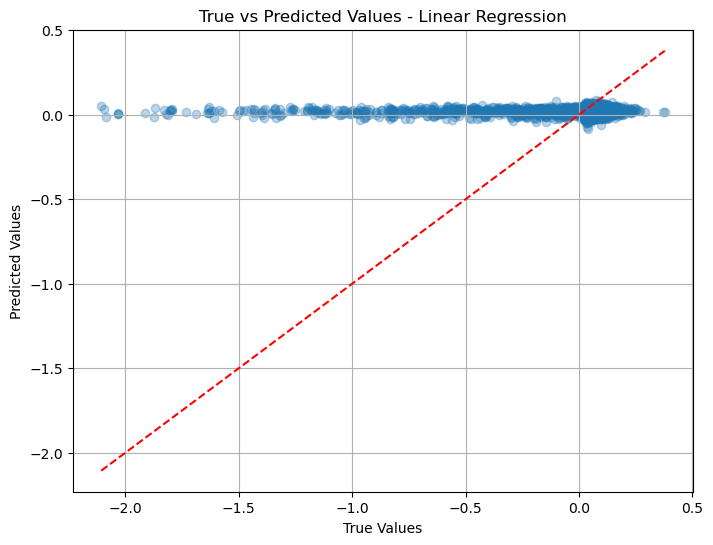

Random Forest Regression Model Results:
Mean Squared Error: 0.032011387108003886
R-squared: 0.0036275200334093816


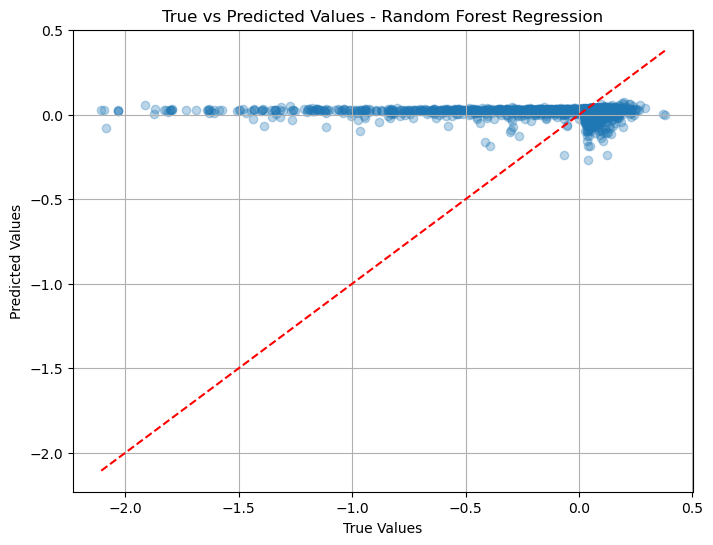

In [127]:
#Both together 
# Cascading method: Filter data by xg_pred == 0
filtered_data = lgc_data[lgc_data['lg_pred'] == 0].copy()

# Add back the 'expected_return' for regression
filtered_data['expected_return'] = expired_2019.loc[filtered_data.index, 'expected_return']

# Prepare data for regression
X_reg = filtered_data.drop(columns=['expected_return', 'yield_is_above_2', 'xg_pred', 'lg_pred']).values
y_reg = filtered_data['expected_return'].values

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build Linear Regression model
reg_model_linear = LinearRegression()
reg_model_linear.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Linear Regression model
y_pred_reg_linear = reg_model_linear.predict(X_test_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_reg_linear)
r2_linear = r2_score(y_test_reg, y_pred_reg_linear)

print("Linear Regression Model Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Optionally, plot the true vs predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_linear, alpha=0.3)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values - Linear Regression')
plt.grid(True)
plt.show()

# Build Random Forest Regression model
reg_model_rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=10, random_state=42)
reg_model_rf.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Random Forest Regression model
y_pred_reg_rf = reg_model_rf.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_reg_rf)
r2_rf = r2_score(y_test_reg, y_pred_reg_rf)

print("Random Forest Regression Model Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Optionally, plot the true vs predicted values for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_rf, alpha=0.3)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values - Random Forest Regression')
plt.grid(True)
plt.show()


We can see an improvement in the performance after leveraging the LG classification, **lets try with the XGBoost**

### Using XGBoost Prediction to implement Cascading 

Linear Regression Model Results:
Mean Squared Error: 0.009874870757338743
R-squared: 0.05273355350460296


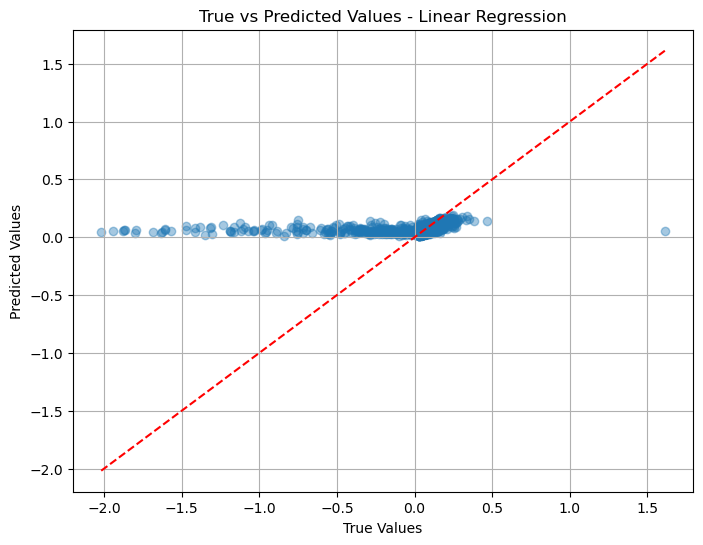

Random Forest Regression Model Results:
Mean Squared Error: 0.00991627761948105
R-squared: 0.048761518616661004


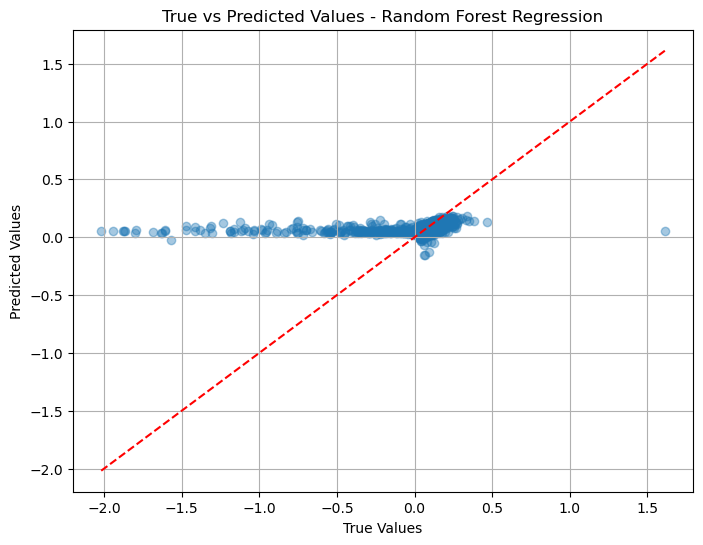

In [128]:
#Both together 
# Cascading method: Filter data by xg_pred == 0
filtered_data = lgc_data[lgc_data['xg_pred'] == 0].copy()

# Add back the 'expected_return' for regression
filtered_data['expected_return'] = expired_2019.loc[filtered_data.index, 'expected_return']

# Prepare data for regression
X_reg = filtered_data.drop(columns=['expected_return', 'yield_is_above_2', 'xg_pred', 'lg_pred']).values
y_reg = filtered_data['expected_return'].values

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build Linear Regression model
reg_model_linear = LinearRegression()
reg_model_linear.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Linear Regression model
y_pred_reg_linear = reg_model_linear.predict(X_test_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_reg_linear)
r2_linear = r2_score(y_test_reg, y_pred_reg_linear)

print("Linear Regression Model Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Optionally, plot the true vs predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_linear, alpha=0.4)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values - Linear Regression')
plt.grid(True)
plt.show()

# Build Random Forest Regression model
reg_model_rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=10, random_state=42)
reg_model_rf.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Random Forest Regression model
y_pred_reg_rf = reg_model_rf.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_reg_rf)
r2_rf = r2_score(y_test_reg, y_pred_reg_rf)

print("Random Forest Regression Model Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Optionally, plot the true vs predicted values for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_rf, alpha=0.4)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values - Random Forest Regression')
plt.grid(True)
plt.show()


### Please Ignore Monitization Section, we'll address this in the coming step
Regression (test) Labeled data 

In [105]:
# Combine X_test_reg and y_test_reg into one DataFrame
test_data = pd.DataFrame(np.concatenate((X_test_reg, y_test_reg.reshape(-1, 1)), axis=1))

# Assign column names to the DataFrame
column_names = list(filtered_data.drop(columns=['expected_return', 'yield_is_above_2', 'xg_pred', 'lg_pred']).columns) + ['expected_return']
test_data.columns = column_names
test_data["linear_pred"]= y_pred_reg_rf
# Now test_data contains both X_test_reg and y_test_reg as one DataFrame
print(test_data.shape)


(13224, 59)


In [49]:
# Sum all the values in the column "loan_amnt"
total_loan_amount = test_data['loan_amnt'].sum()
print(f"Total sum of loan_amnt: {total_loan_amount}")

Total sum of loan_amnt: 415992200


In [101]:
# for index, column_name in enumerate(test_data.columns, start=1):
#     print(f"{index}. {column_name}")

In [96]:
import pandas as pd
import numpy as np

# Assuming 'test_data' is already defined and contains the necessary columns

# Set your budget
budget = 5000000  # Example budget, adjust as needed

# Sort the DataFrame by 'linear_pred' in descending order
sorted_loans = test_data.sort_values(by='linear_pred', ascending=False)

# Initialize variables to track the total invested amount and total expected return
total_invested = 0
total_expected_return = 0

# List to keep track of selected loans
selected_loans = []

# Iterate through the sorted DataFrame
for index, row in sorted_loans.iterrows():
    loan_amount = row['loan_amnt']
    expected_return = row['expected_return']
    
    if total_invested + loan_amount <= budget:
        total_invested += loan_amount
        total_expected_return += expected_return * loan_amount
        selected_loans.append(row)
    else:
        # If adding the full loan amount exceeds the budget, only add the portion that fits
        remaining_budget = budget - total_invested
        total_invested += remaining_budget
        total_expected_return += expected_return * remaining_budget
        partial_loan = row.copy()
        partial_loan['loan_amnt'] = remaining_budget
        selected_loans.append(partial_loan)
        break

# Calculate the overall expected return percentage
if total_invested > 0:
    overall_expected_return_percentage = total_expected_return / total_invested
else:
    overall_expected_return_percentage = 0

# Convert the list of selected loans back to a DataFrame
selected_loans_df = pd.DataFrame(selected_loans)

print("Total Invested:", total_invested)
print("Overall Expected Return Percentage:", overall_expected_return_percentage *10, "%")
# print("Selected Loans:")
# print(selected_loans_df.head())


Total Invested: 5000000
Overall Expected Return Percentage: 1.9735500007609497 %


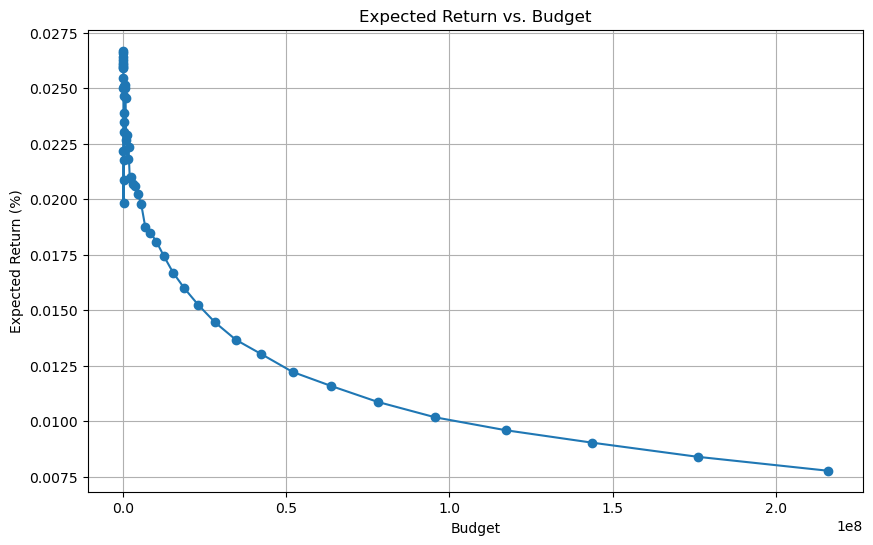

In [66]:
import matplotlib.pyplot as plt

# Define a range of budgets (e.g., from 10,000 to 200,000 in increments of 10,000)
budget_range = np.geomspace(10000, 215992200, num=50) 


# List to store the overall expected return for each budget
expected_returns = []

# Function to calculate expected return for a given budget
def calculate_expected_return(budget):
    total_invested = 0
    total_expected_return = 0

    for index, row in sorted_loans.iterrows():
        loan_amount = row['loan_amnt']
        expected_return = row['expected_return']
        
        if total_invested + loan_amount <= budget:
            total_invested += loan_amount
            total_expected_return += expected_return * loan_amount
        else:
            remaining_budget = budget - total_invested
            total_invested += remaining_budget
            total_expected_return += expected_return * remaining_budget
            break

    if total_invested > 0:
        overall_expected_return_percentage = total_expected_return / total_invested
    else:
        overall_expected_return_percentage = 0

    return overall_expected_return_percentage /10  # Convert to percentage

# Calculate the expected return for each budget in the range
for budget in budget_range:
    expected_returns.append(calculate_expected_return(budget))

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(budget_range, expected_returns, marker='o')
plt.title('Expected Return vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Expected Return (%)')
plt.grid(True)
plt.show()


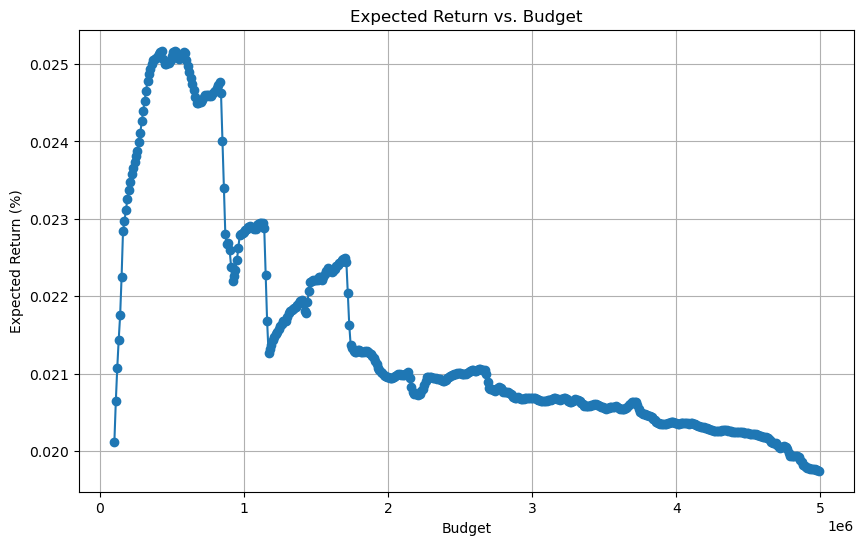

In [70]:
import matplotlib.pyplot as plt
#415,992,200

# Define a range of budgets (e.g., from 10,000 to 200,000 in increments of 10,000)

# List to store the overall expected return for each budget
expected_returns = []

# Function to calculate expected return for a given budget
def calculate_expected_return(budget):
    total_invested = 0
    total_expected_return = 0

    for index, row in sorted_loans.iterrows():
        loan_amount = row['loan_amnt']
        expected_return = row['expected_return']
        
        if total_invested + loan_amount <= budget:
            total_invested += loan_amount
            total_expected_return += expected_return * loan_amount
        else:
            remaining_budget = budget - total_invested
            total_invested += remaining_budget
            total_expected_return += expected_return * remaining_budget
            break

    if total_invested > 0:
        overall_expected_return_percentage = total_expected_return / total_invested
    else:
        overall_expected_return_percentage = 0

    return overall_expected_return_percentage /10  # Convert to percentage

# Calculate the expected return for each budget in the range
for budget in budget_range:
    expected_returns.append(calculate_expected_return(budget))

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(budget_range, expected_returns, marker='o')
plt.title('Expected Return vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Expected Return (%)')
plt.grid(True)
plt.show()


We can see a much superior performance using the XGBoost

### Prediction vs Real values + Avg as benchmark

Linear Regression Model Results:
Mean Squared Error: 0.0038475761198454453
R-squared: 0.1418507265722968


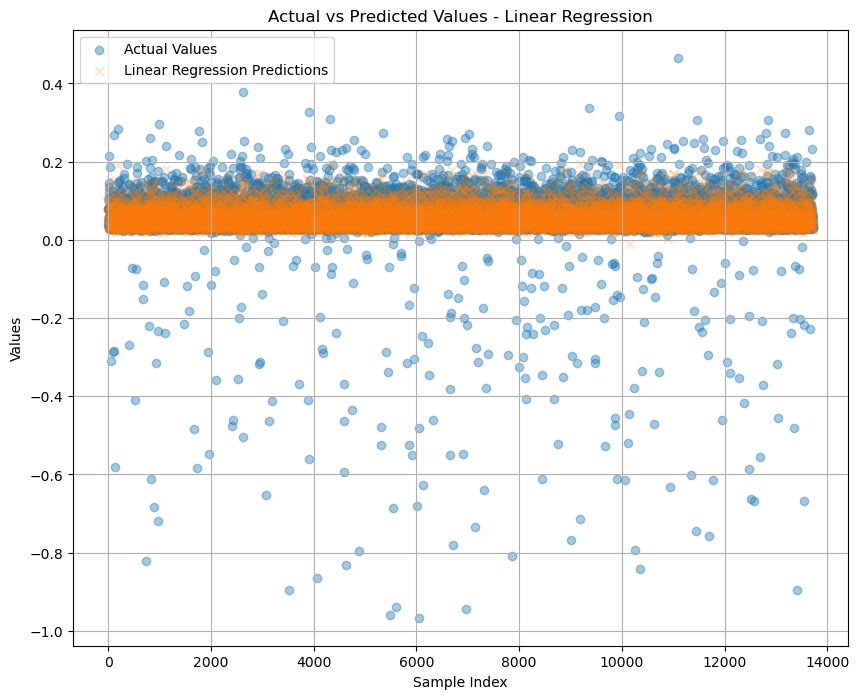

Random Forest Regression Model Results:
Mean Squared Error: 0.003872073639959997
R-squared: 0.13638688948830746


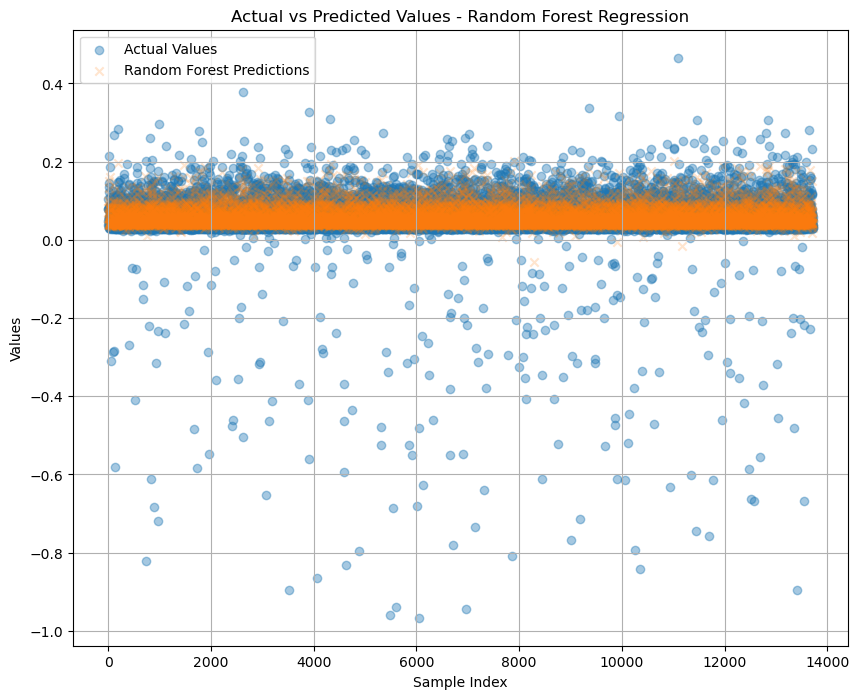

Benchmark Model Results:
Mean Squared Error: 0.004488040838148482
R-squared: -0.0009961763994128514


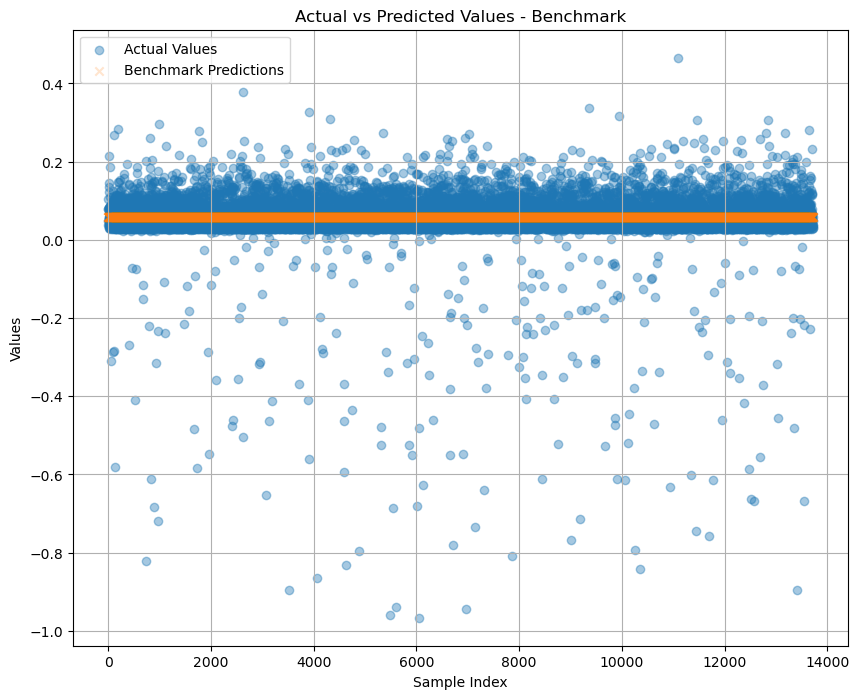

In [20]:

# Define Benchmark class taken from alon's ML course
class Benchmark:
    def fit(self, x, y):
        self.value = y.mean()
        return self
    
    def predict(self, x):
        return np.ones(len(x)) * self.value

# Cascading method: Filter data by xg_pred == 0
filtered_data = lgc_data[lgc_data['xg_pred'] == 0].copy()

# Add back the 'expected_return' for regression
filtered_data['expected_return'] = expired_2019.loc[filtered_data.index, 'expected_return']

# Prepare data for regression
X_reg = filtered_data.drop(columns=['expected_return', 'yield_is_above_2', 'xg_pred', 'lg_pred']).values
y_reg = filtered_data['expected_return'].values

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build Linear Regression model
reg_model_linear = LinearRegression()
reg_model_linear.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Linear Regression model
y_pred_reg_linear = reg_model_linear.predict(X_test_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_reg_linear)
r2_linear = r2_score(y_test_reg, y_pred_reg_linear)

print("Linear Regression Model Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Plotting the true vs predicted values for Linear Regression
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test_reg)), y_test_reg, alpha=0.4, label='Actual Values', marker='o')
plt.scatter(range(len(y_test_reg)), y_pred_reg_linear, alpha=0.2, label='Linear Regression Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Build Random Forest Regression model
reg_model_rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=10, random_state=42)
reg_model_rf.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Random Forest Regression model
y_pred_reg_rf = reg_model_rf.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_reg_rf)
r2_rf = r2_score(y_test_reg, y_pred_reg_rf)

print("Random Forest Regression Model Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Plotting the true vs predicted values for Random Forest Regression
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test_reg)), y_test_reg, alpha=0.4, label='Actual Values', marker='o')
plt.scatter(range(len(y_test_reg)), y_pred_reg_rf, alpha=0.2, label='Random Forest Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values - Random Forest Regression')
plt.legend()
plt.grid(True)
plt.show()

# Instantiate Benchmark and evaluate
benchmark = Benchmark()
benchmark.fit(X_train_reg, y_train_reg)
y_pred_benchmark = benchmark.predict(X_test_reg)
mse_benchmark = mean_squared_error(y_test_reg, y_pred_benchmark)
r2_benchmark = r2_score(y_test_reg, y_pred_benchmark)

print("Benchmark Model Results:")
print(f"Mean Squared Error: {mse_benchmark}")
print(f"R-squared: {r2_benchmark}")

# Plotting the true vs predicted values for Benchmark
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test_reg)), y_test_reg, alpha=0.4, label='Actual Values', marker='o')
plt.scatter(range(len(y_test_reg)), y_pred_benchmark, alpha=0.2, label='Benchmark Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values - Benchmark')
plt.legend()
plt.grid(True)
plt.show()


## Confidence interval (Please ignore this section will be fully implemented in the next step)

The code calculates prediction errors between the model's predicted values and actual target 
values, then computes the mean and standard deviation of these errors. It uses this information
to determine confidence intervals at 95% and 99% levels, which help assess the variability and 
uncertainty in the model's predictions. By performing a one-sample t-test, the code tests if the
average return is significantly higher than 2%. This analysis is crucial for understanding the risk
factor in loans, as it quantifies the range of expected returns and provides statistical evidence
about their performance. The results guide investment decisions by indicating the level of risk 
and potential profitability of the loans.

In [21]:

# Predictions and targets
y_pred = y_pred_reg_linear  # Replace with y_pred_reg_rf or y_pred_benchmark for other models
y_test = y_test_reg

# Calculate the prediction errors
errors = y_pred - y_test

# Calculate mean and standard deviation of the errors
mean_error = np.mean(errors)
std_error = np.std(errors, ddof=1)

# Sample size
n = len(errors)

# Confidence levels
confidence_levels = [0.95, 0.99]

# Function to calculate confidence interval
def confidence_interval(mean, std, n, confidence_level):
    z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Calculate confidence intervals
for confidence_level in confidence_levels:
    lower_bound, upper_bound = confidence_interval(mean_error, std_error, n, confidence_level)
    print(f"Confidence Level: {confidence_level*100}%")
    print(f"Lower Bound: {lower_bound:.4f}")
    print(f"Upper Bound: {upper_bound:.4f}")

# Hypothesis testing (One-sample t-test)
alpha = 0.05  # significance level
t_statistic, p_value = stats.ttest_1samp(errors, 2)
if p_value < alpha:
    print("Reject the null hypothesis (H0): The average return is higher than 2%.")
else:
    print("Fail to reject the null hypothesis (H0): The average return is not higher than 2%.")


Confidence Level: 95.0%
Lower Bound: 0.0007
Upper Bound: 0.0027
Confidence Level: 99.0%
Lower Bound: 0.0003
Upper Bound: 0.0031
Reject the null hypothesis (H0): The average return is higher than 2%.


### Baseline –  Grade Based Model Classification Using Grade A
(A is the class with lowest percentge of loans under 2%)

Linear Regression Model Results:
Mean Squared Error: 0.009073131236868119
R-squared: 0.012389938477369244


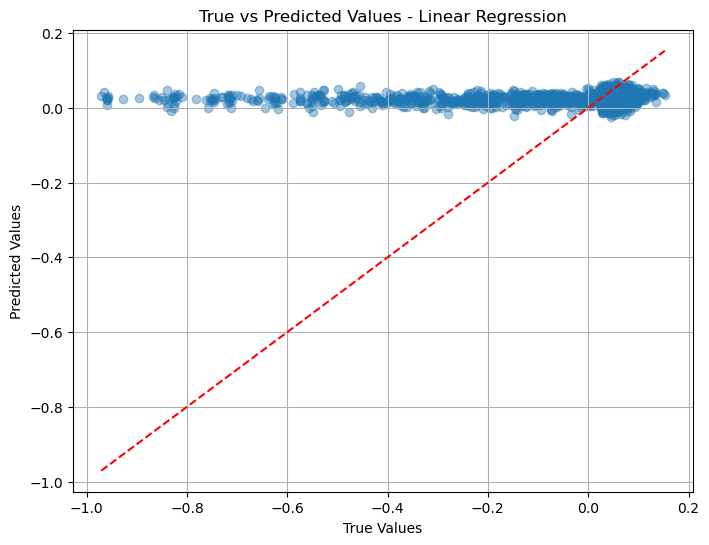

Random Forest Regression Model Results:
Mean Squared Error: 0.0091319741723801
R-squared: 0.005984886721364879


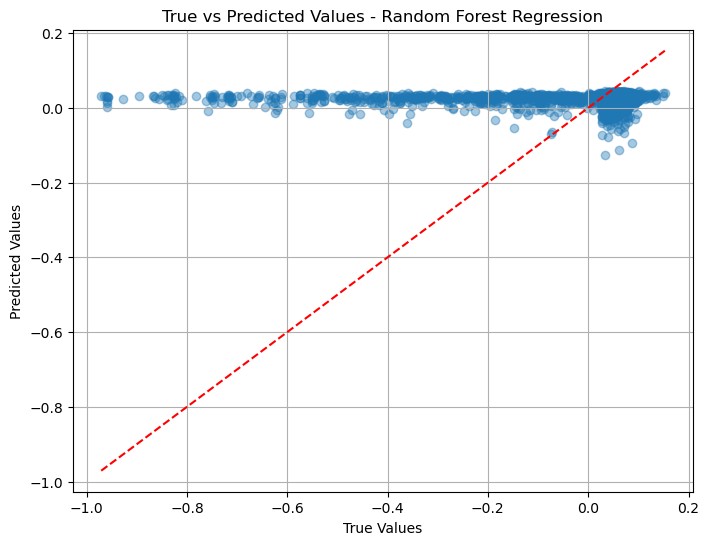

In [31]:
#Both together 
# Cascading method: Filter data by grade=1 (1)
filtered_data = lgc_data[lgc_data['grade'] == 1].copy() 

# Add back the 'expected_return' for regression
filtered_data['expected_return'] = expired_2019.loc[filtered_data.index, 'expected_return']

# Prepare data for regression
X_reg = filtered_data.drop(columns=['expected_return', 'yield_is_above_2', 'xg_pred', 'lg_pred']).values
y_reg = filtered_data['expected_return'].values

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build Linear Regression model
reg_model_linear = LinearRegression()
reg_model_linear.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Linear Regression model
y_pred_reg_linear = reg_model_linear.predict(X_test_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_reg_linear)
r2_linear = r2_score(y_test_reg, y_pred_reg_linear)

print("Linear Regression Model Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Optionally, plot the true vs predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_linear, alpha=0.4)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values - Linear Regression')
plt.grid(True)
plt.show()

# Build Random Forest Regression model
reg_model_rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=10, random_state=42)
reg_model_rf.fit(X_train_reg, y_train_reg)

# Predict and evaluate the Random Forest Regression model
y_pred_reg_rf = reg_model_rf.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_reg_rf)
r2_rf = r2_score(y_test_reg, y_pred_reg_rf)

print("Random Forest Regression Model Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Optionally, plot the true vs predicted values for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_rf, alpha=0.4)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values - Random Forest Regression')
plt.grid(True)
plt.show()


**A Cleaner look at the Evaluation Metrics With ChatGPTs help**

In [100]:
import pandas as pd
import numpy as np

# Define the data
data = {
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Benchmark Model': [0.004488040838148482, -0.0009961763994128514],
    'XGB & Random Forest Regression': [0.003872073639959997, 0.13638688948830746],
    'XGB & Linear Regression': [0.0038475761198454453, 0.1418507265722968],
    'Lg & Linear Regression': [0.011572771764759819, 0.010828909097522765],
    'Lg Random Forest Regression': [0.011641292470528855, 0.004972170309900714]
}

# Create DataFrame
df = pd.DataFrame(data)

# Find the maximum value in each row, ignoring the first column (Metrics)
max_values = df.iloc[:, 1:].max(axis=1)

# Find the minimum value in the first row
min_value_row_0 = df.iloc[0, 1:].min()

# Function to apply colors
def highlight_values(data, max_values, min_value_row_0, min_color='green', max_color='green'):
    min_attr = f'background-color: {min_color}'
    max_attr = f'background-color: {max_color}'
    
    is_max = data.iloc[:, 1:].eq(max_values, axis=0)
    is_min_row_0 = data.iloc[0, 1:].eq(min_value_row_0)
    
    result = pd.DataFrame('', index=data.index, columns=data.columns[1:])
    result.iloc[0, :] = np.where(is_min_row_0, min_attr, '')
    result.iloc[1:, :] = np.where(is_max.iloc[1:], max_attr, '')
    
    return result

# Apply the highlight function
styled_table = df.style.apply(highlight_values, max_values=max_values, min_value_row_0=min_value_row_0, axis=None)

# Display the table
styled_table


,Metric,Benchmark Model,XGB & Random Forest Regression,XGB & Linear Regression,Lg & Linear Regression,Lg Random Forest Regression
0,Mean Squared Error,0.004488,0.003872,0.003848,0.011573,0.011641
1,R-squared,-0.000996,0.136387,0.141851,0.010829,0.004972


**We can see that the besst combination is the the Mix between the XGBoost classification model and Linear regression**